# VR Survey

This notebook will reproduce some charts related to a survey conducted to understand the point of view of researchers, developers, designers and users in order to target software testing activity at points that these interest groups deem important. 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the csv file
results = pd.read_csv('survey/responses.csv')

# Number of responders by questions:

In [32]:
results.count()

Carimbo de data/hora                                                                                                                      88
How do you rate your profile?                                                                                                             88
How often do you use virtual reality (gaming, graphics) applications?                                                                     88
What VR applications do you use more?                                                                                                     88
Malfunction, or bugs contributes to a negative experience using VR (gaming, graphics) applications. Regarding the above statement you:    88
Visual                                                                                                                                    88
Audio                                                                                                                                     88
Design       

In [33]:
# Do some minor cleanups on the data
# Rename the columns to make it easier to manipulate
# The data comes in through a dictionary so we can not assume order stays the
# same so must name each column

column_names = {'Carimbo de data/hora': 'timestamp',
                'How do you rate your profile?': 'profile',
                'How often do you use virtual reality (gaming, graphics) applications?': 'freq-vr',
                'What VR applications do you use more?': 'most-used-vr',
                'Malfunction, or bugs contributes to a negative experience using VR (gaming, graphics) applications. Regarding the above statement you:': 'bad-experience',
                'Visual': 'annoy-visual',
                'Audio': 'annoy-audio',
                'Design': 'annoy-design',
                'IA': 'annoy-ia',
                'Physics': 'annoy-physics',
                'Stability': 'annoy-stability',
                'Performance': 'annoy-performance',
                'Networking': 'annoy-net', 
                'Technical capabilities of the application (e.g. head tracking, resolution, latency)': 'impeditive-technical',
                'Nausea when using the app': 'impeditive-nausea',
                'Fidelity of virtual world (e.g. how real does it look)': 'impeditive-virtual_world',
                'Awareness of real world (e.g. who is there when using a head mounted display)': 'impeditive-real_world',
                'Interacting with real world objects (e.g. picking up a cup)': 'impeditive-interaction', 
                'Interacting with real world peripherals (e.g. via keyboardmousemotion controllers..)': 'impeditive-peripherals',
                'Providing input to the virtual world (e.g. via peripherals gesture voice etc.)': 'impeditive-inputs',
                'Visual': 'faults-visual',
                'Audio': 'faults-audio',
                'Level Design': 'faults-level_design',
                'IA': 'faults-ia',
                'Physics': 'faults-physiscs',
                'Stability': 'faults-stability',
                'Performance': 'faults-performance',
                'Networking': 'faults-net',
                'Would you like to list a possible flaw fault or bug that was not described in the list above and you judge as critial?': 'faults-other',
                'Enter your e-mail adress if you would like toreceive the compiled search results': 'notify',
                
                }
results.rename(columns=column_names, inplace=True)
results.timestamp = pd.to_datetime(results.timestamp)

## How responders rate theier profile?

In [34]:

results['profile'].value_counts()

User         41
Student      18
Professor    14
Designer      8
Developer     7
Name: profile, dtype: int64

dict_keys(['User', 'Student', 'Professor', 'Designer', 'Developer']) [41, 18, 14, 8, 7]


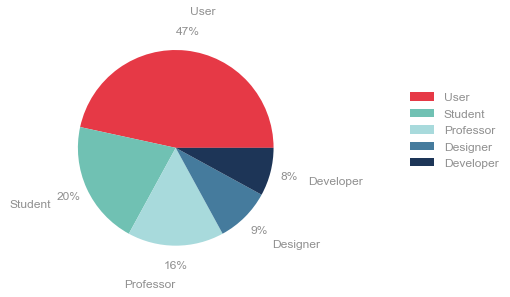

In [35]:
#color_palette_list = ['#DEB4B7', '#BDE3E9', '#9DD9F0', '#D2BDDB','#F6CDE0', '#F3A58B', '#FCF5BF']
color_palette_list = ['#e63946', '#70c1b3', '#a8dadc', '#457b9d', '#1d3557', '#AA17D5', '#F88E0D']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['profile'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# How often do you use VR applications?


dict_keys(['Weekly', 'Monthly', 'Yearly or less often', 'Daily', 'Never']) [26, 25, 22, 14, 1]


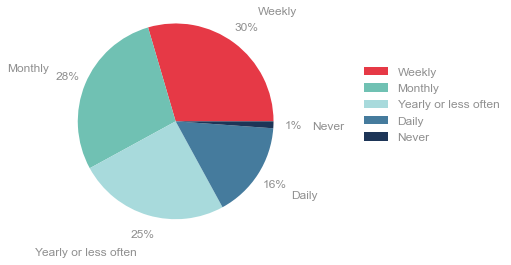

In [36]:
color_palette_list = ['#e63946', '#70c1b3', '#a8dadc', '#457b9d', '#1d3557']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['freq-vr'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

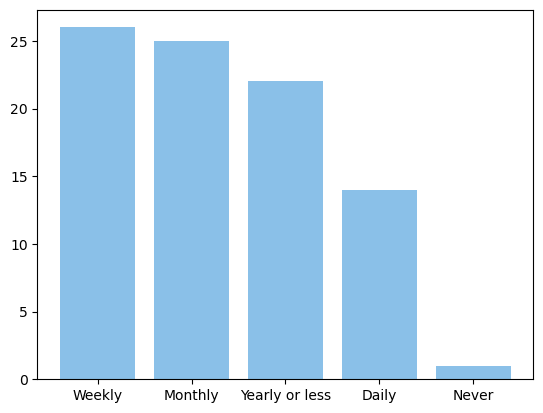

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Weekly', 'Monthly', 'Yearly or less', 'Daily', 'Never')
y_pos = np.arange(len(objects))
performance =  [26, 25, 22, 14, 1]

#3C97DA

plt.bar(y_pos, performance, align='center', alpha=0.6, color = '#3C97DA')
plt.xticks(y_pos, objects)
#plt.title('Frequency of using VR applications')

plt.show()

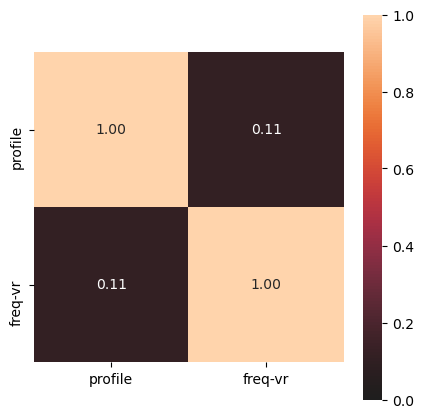

{'corr':           profile   freq-vr
 profile  1.000000  0.113251
 freq-vr  0.114503  1.000000,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x157e6be0>}

In [38]:
import dython

profile_frequency_df = results[["profile", "freq-vr"]]

profile_frequency_df.head
dython.nominal.associations(profile_frequency_df, theil_u=True, figsize=(5, 5))

# What VR applications do you use more?

dict_keys(['Gaming', 'Simulation', 'Media', 'Productivity', 'Modelling', 'Therapeutic']) [58, 10, 10, 5, 3, 2]


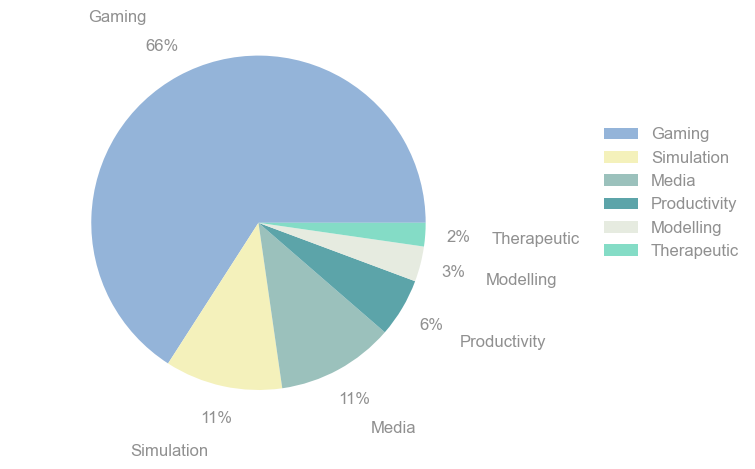

In [39]:
color_palette_list = ['#94B4D9', '#f4f1bb', '#9bc1bc', '#5ca4a9', '#e6ebe0', '#84dcc6']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['most-used-vr'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# Malfunction, or bugs contributes to a negative experience using VR applications. Regarding the above statement you:

In [40]:
#get the likert scale results
bad_experience = pd.DataFrame(results['bad-experience'])
columns = bad_experience['bad-experience'].unique()

#convert from categorical to numerical
responses = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}
bad_experience['numerical'] = bad_experience['bad-experience'].map(responses)

#define the condition of the likert scale
bad_experience.insert(loc=0, column='condition', value='cond')

#order the title of the columns
columns_titles = ['condition', 'numerical', 'bad-experience']
bad_experience = bad_experience.reindex(columns=columns_titles)

bad_experience.head()


,condition,numerical,bad-experience
0,cond,5,Strongly Agree
1,cond,4,Agree
2,cond,5,Strongly Agree
3,cond,5,Strongly Agree
4,cond,4,Agree


['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'] [2, 3, 14, 39, 30]


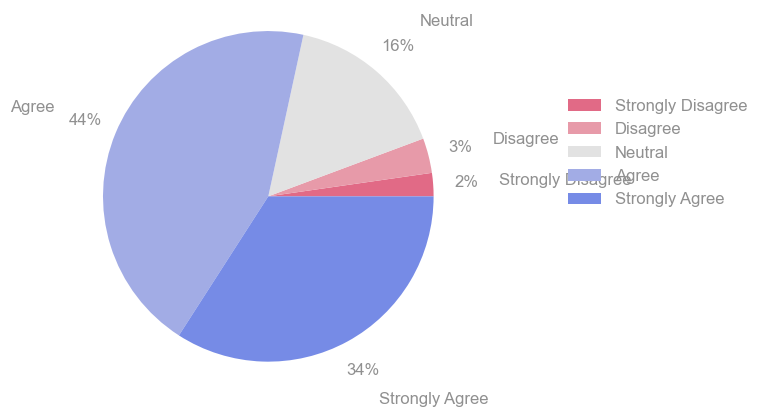

In [41]:
color_palette_list = ['#e16a86', '#e79aa9' , '#e2e2e2', '#a2ace5', '#768be6', ]

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['bad-experience'].value_counts())

#get the keys and the values of the dict
labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
